## Objectives:
- Import data and perform basic data exploration phase
- Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
- Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
- Perform partitional clustering using the K-means algorithm. Then, plot the clusters
- Find the best k value and plot the clusters again.
- Interpret the results

   * This case requires to develop a customer segmentation to define marketing strategy.


In [11]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [12]:
#loading the dataset
cc = pd.read_csv('Credit_card_dataset.csv')
cc.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [13]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [14]:
cc.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [15]:
#checking for missing values
cc.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [16]:
#handling missing values
cc['CREDIT_LIMIT'] = cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].mean())

In [17]:
#checking for missing values
cc.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [18]:
#checking for duplicates
cc.duplicated().sum()

np.int64(0)

In [28]:
cc.shape

(5564, 6)

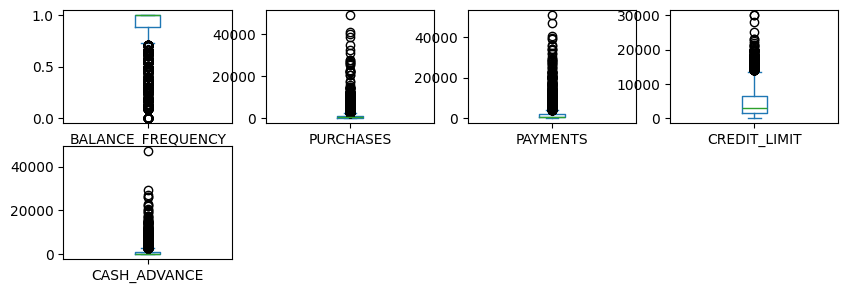

In [19]:
# box plot to visualize outliers
cc.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

In [25]:
def remove_outliers(cc, column = ['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']):
    Q1 = cc[column].quantile(0.25)
    Q3 = cc[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cc[(cc[column] >= lower_bound) & (cc[column] <= upper_bound)]
    
numerical_columns = ['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']
for col in numerical_columns:
    cc = remove_outliers(cc, col)


In [27]:
cc.shape

(5564, 6)

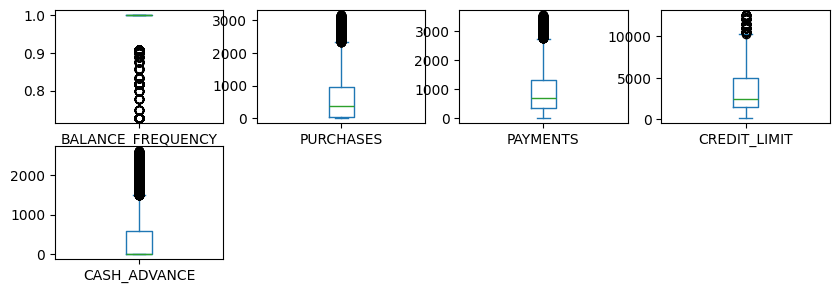

In [29]:
# box plot to visualize dataset after removing outliers
cc.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

## performing Hierarchical clustering 
Using 'PURCHASES' & 'CREDIT_LIMIT' for clustering

In [30]:
#selecting features for clustering 
x = cc[['PURCHASES', 'CREDIT_LIMIT']].values

In [31]:
# standardizing the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# performing hierarchical clustering
linkage_matrix = linkage(x_scaled, method = 'ward')

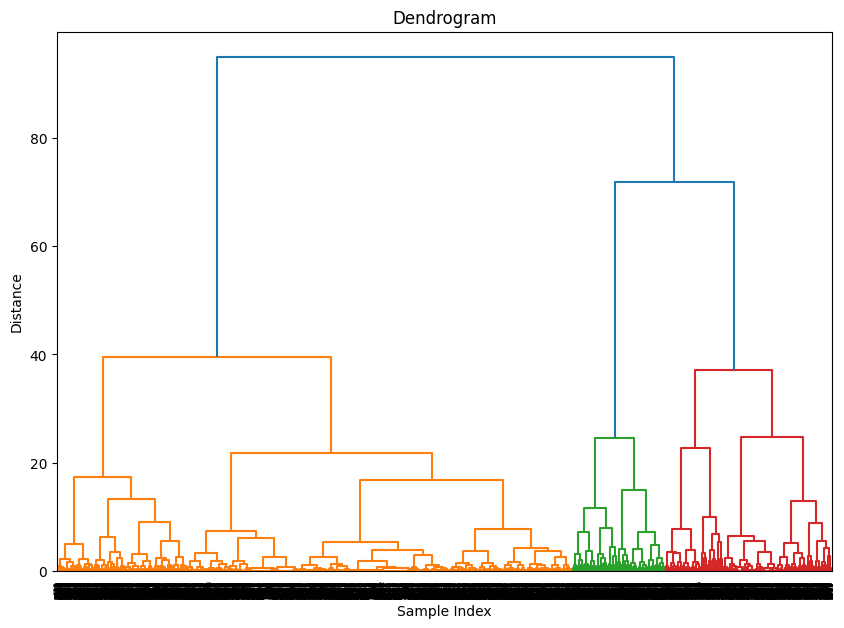

In [33]:
#ploting a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [37]:
# performing hierarchical clustering using a specific number of clusters (first used 3 but seemed too concetrated , 6)
from scipy.cluster.hierarchy import fcluster
n_clusters = 6
cluster_labels = fcluster(linkage_matrix, n_clusters, criterion = 'maxclust')

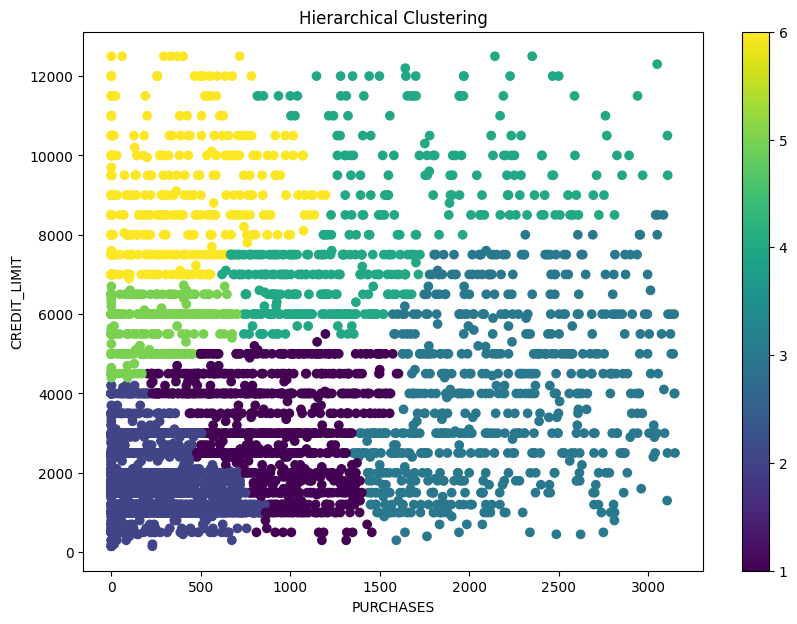

In [38]:
#plotting the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.colorbar(scatter)
plt.show()

## Partitional clustering using KMeans

In [43]:
# performing K_means clustering with 6 clusters
Kmeans = KMeans(n_clusters = 6, random_state = 42)
cluster_labels = Kmeans.fit_predict(x_scaled)

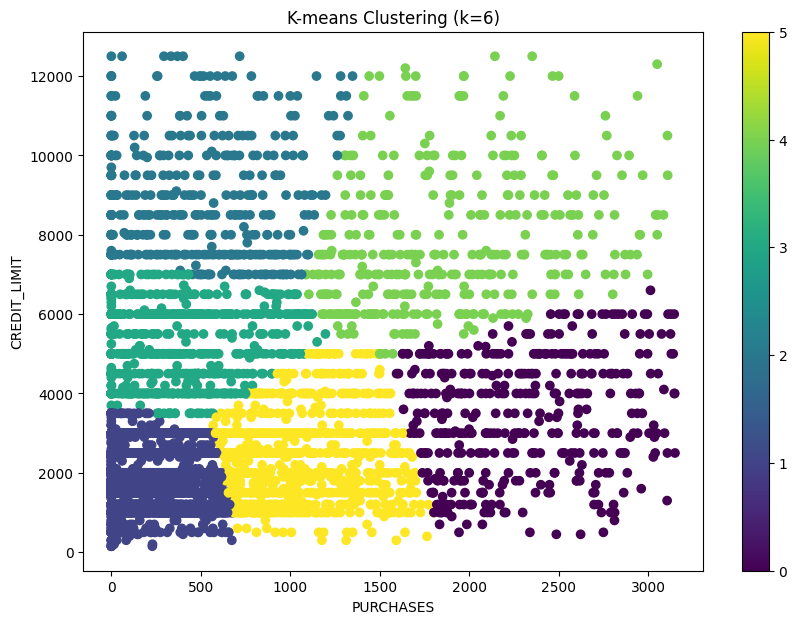

In [44]:
#plotting the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering (k=6)')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.colorbar(scatter)
plt.show()

In [47]:
# finding the best K value using the Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    Kmeans = KMeans(n_clusters = k, random_state = 42)
    Kmeans.fit(x_scaled)
    inertias.append(Kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, Kmeans.labels_))
    

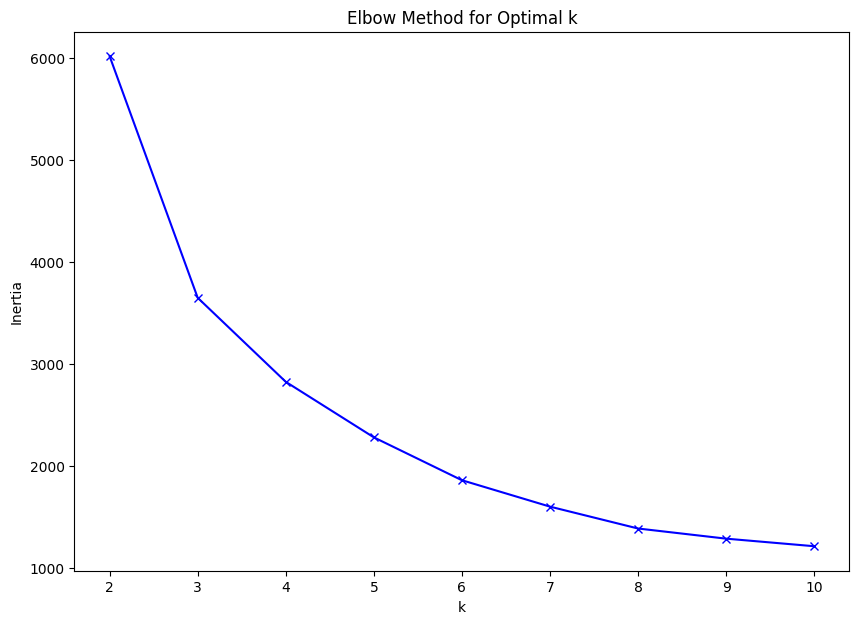

In [48]:
#plotting the elbow curve
plt.figure(figsize=(10, 7))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

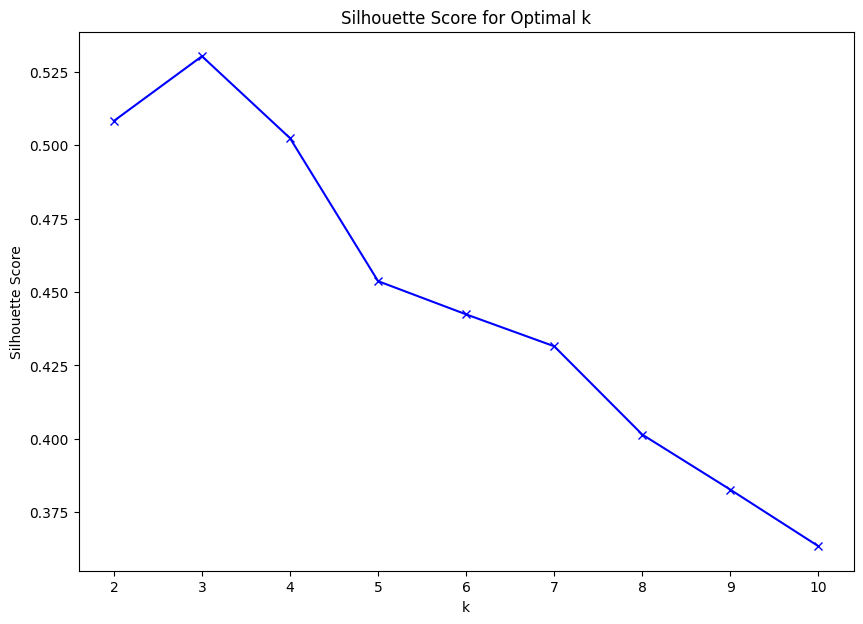

In [49]:
#plotting the silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [50]:
# from above plotting the best k value is 3
# performing k-means clustering 
best_k = 3
Kmeans_best = KMeans(n_clusters = best_k, random_state = 42)
cluster_labels_best = Kmeans_best.fit_predict(x_scaled)

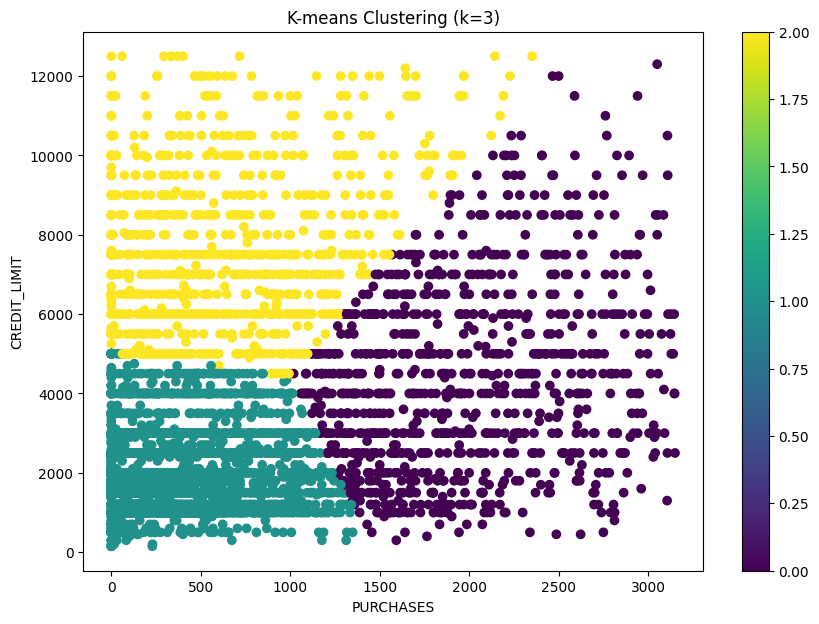

In [52]:
#plotting the best k value
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x[:, 0], x[:, 1], c=cluster_labels_best, cmap='viridis')
plt.title(f'K-means Clustering (k={best_k})')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.colorbar(scatter)
plt.show()

## Interpretation

Cluster 1: Low purchases, low credit limit (conservative spenders).
Cluster 2: High purchases, high credit limit (big spenders).
Cluster 3: Medium purchases, medium credit limit (average consumers).
Cluster 4: (if applicable): Any other distinct group that emerges.

  * Based on these clusters, develop targeted marketing strategies
     - for conservative spenders, offer incentives to increase card usage
     - for average spenders, promote balanced spending and savings programs
     - for mbig spenders, provide premium services and high credit limits

    
 * NB: this analysis is based on the purchases and credit limit for better segmentation consider adding more essential features and use of advanced techniques before clustering.